# Biodiversity Intactness Index (BII) change in Phoenix, Arizona

Author: Eva Newby

Date: December 12, 2024

[More detailed content is available in this Github repository's README.md](https://github.com/evajnewby/Phoenix-BII)

## About

This analysis aims to explore the changes in BII within the Phoenix County subdivision area from 2017 to 2020, highlighting the impact of urban growth on biodiversity over time. This notebook contains code to create a map of the Phoenix subdivision in its broader geographic context, calculate the percentage of the subdivision's area with a BII of at least 0.75 in both 2017 and 2020, and develop a visualization to illustrate the area with a BII ≥ 0.75 in 2017 that was lost by 2020.

## Highlights:

- Access data from the Microsoft Planetary Computer STAC Catalog
- Wrangling vector and raster data
- Plotting raster data
- Pixel selection

## The Dataset
The BII data was accessed from the Microsoft Planetary Computer STAC Catalog. The code in this notebook contains steps to access the catalog for the correct location and dates. 

The Arizona shapefile was accessed from the US Census Bureau's TIGER shapefiles. The code in this notebook contains steps to filter to the Phoenix area only. 

Data reference:
Microsoft. IO Biodiversity Dataset. Planetary Computer. Retrieved from https://planetarycomputer.microsoft.com/dataset/io-biodiversity

U.S. Census Bureau. (2020). 2020 Census County Subdivisions Shapefiles. U.S. Department of Commerce. Retrieved from https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2020&layergroup=County+Subdivisions

## Step-by-Step Workflow

## Load Packages

In [44]:
# Load Packages
from pystac_client import Client  # To access STAC catalogs
import planetary_computer  # To sign items from the MPC STAC catalog 
from IPython.display import Image  # To nicely display images

import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import rioxarray as rioxr
import os

## Import Data

### Access Microsoft Planetary Catalog
We will also need to create and save the Phoenix rasters for 2017 and 2020.

In [45]:
# Define bounding box for Phoenix area
phoenix_bbox = list([-112.826843, 32.974108, -111.184387, 33.863574])

# Define time range
time_range = "2017-01-01/2020-01-01"

# Access Microsoft Planetary Catalog
catalog = Client.open(
"https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

search = catalog.search(collections = ['io-biodiversity'], bbox = phoenix_bbox, datetime= time_range
                       )

search

In [3]:
# Retrieve search items
items = search.item_collection()
print(f"Returned {len(items)} items")
items

Returned 4 items


Now that we have our search items from the MPC, let's extract and view the rasters for both 2017 and 2020. 

In [36]:
# Extract 2017 
item_2017 = items[3]

# View 2017
Image(url = item_2017.assets['rendered_preview'].href, width = 600)

In [6]:
# Extract 2020
item_2020 = items[0]

# View 2020
Image(url = item_2020.assets['rendered_preview'].href, width = 600)

Looking above at the rendered preview images, we confirm that this area includes Phoenix. Now, let's create, save, and view the rasters for 2017 and 2020.

In [37]:
# Create 2017 Phoenix BII raster
bii2017 = rioxr.open_rasterio(item_2017.assets['data'].href)

# View
bii2017

<xarray.DataArray (band: 1, y: 7992, x: 7992)> Size: 255MB
[63872064 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 64kB -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 64kB 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [38]:
# Create 2020 Phoenix BII Raster
bii2020 = rioxr.open_rasterio(item_2020.assets['data'].href)

# View
bii2020

<xarray.DataArray (band: 1, y: 7992, x: 7992)> Size: 255MB
[63872064 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 64kB -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 64kB 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

### Read in Arizona Shapfiles

Now that we have our MPC data read in, let's read in the shapefiles for the state of Arizona. 

In [39]:
# Read in Arizona Shapefiles
arizona = gpd.read_file(os.path.join('data',
                                    'tl_2020_04_cousub.shp'))

## Explore Data

Let's explore the Arizona data to best figure out how to filter to the Phoenix area. 

<Axes: >

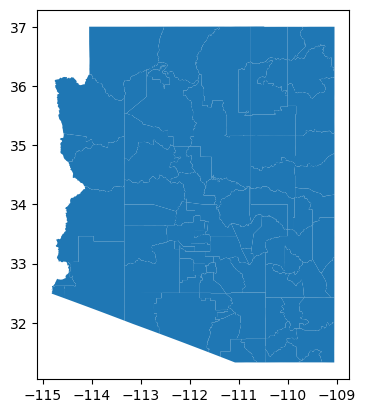

In [40]:
# Confirm shapefile is of Arizona
arizona.plot()

In [41]:
# First 5 rows
arizona.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,04,015,91964,02582914,0401591964,Lake Havasu City,Lake Havasu City CCD,22,Z5,G4040,None,None,None,S,7493863105,50863803,+34.7686221,-113.8749805,"POLYGON ((-114.48778 34.71722, -114.48622 34.7..."
1,04,007,91277,02582913,0400791277,Fort Apache,Fort Apache CCD,22,Z5,G4040,None,None,None,S,2134058292,4388167,+33.8847663,-110.3394452,"POLYGON ((-110.78327 34.16750, -110.78276 34.1..."
2,04,003,90306,01934923,0400390306,Bisbee,Bisbee CCD,22,Z5,G4040,None,None,None,S,1610943633,3494169,+31.4580397,-110.0783372,"POLYGON ((-110.46089 31.47376, -110.46089 31.4..."
3,04,003,90408,01934925,0400390408,Bowie,Bowie CCD,22,Z5,G4040,None,None,None,S,3556140749,1110460,+32.1699052,-109.3999964,"POLYGON ((-109.76866 32.30583, -109.76787 32.3..."
4,04,003,93825,01934992,0400393825,Willcox,Willcox CCD,22,Z5,G4040,None,None,None,S,1898081614,4959613,+32.1980984,-109.8877527,"POLYGON ((-110.15218 32.17203, -110.15213 32.1..."


In [42]:
# Get info
arizona.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   80 non-null     object  
 1   COUNTYFP  80 non-null     object  
 2   COUSUBFP  80 non-null     object  
 3   COUSUBNS  80 non-null     object  
 4   GEOID     80 non-null     object  
 5   NAME      80 non-null     object  
 6   NAMELSAD  80 non-null     object  
 7   LSAD      80 non-null     object  
 8   CLASSFP   80 non-null     object  
 9   MTFCC     80 non-null     object  
 10  CNECTAFP  0 non-null      object  
 11  NECTAFP   0 non-null      object  
 12  NCTADVFP  0 non-null      object  
 13  FUNCSTAT  80 non-null     object  
 14  ALAND     80 non-null     int64   
 15  AWATER    80 non-null     int64   
 16  INTPTLAT  80 non-null     object  
 17  INTPTLON  80 non-null     object  
 18  geometry  80 non-null     geometry
dtypes: geometry(1), int64(2), object(16)
memory 

From the preliminary data exploration, we know that in order to filter to Phoenix, we need to use the `NAME` column.

<Axes: >

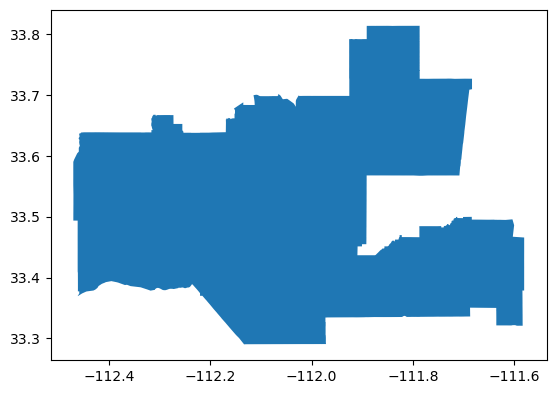

In [43]:
# Filter to Phoenix
phoenix = arizona[arizona['NAME'] == 'Phoenix']

# View
phoenix.plot()

In [13]:
# Get CRS
phoenix.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

#### Phoenix Data Description:

Both the Arizona and Phoenix plots confirm that we have the correct areas for our further analysis. Access to the CRS is helpful for future plotting with the Microsoft Planetary Catalog data. Additionally, having access to column names and data types are helpful for filtering the Arizona data to the Phoenix area.  

#### MPC Data Description: 

Opening and exploring the rasters when reading in provides useful information for future analysis. For example, the preview plots confirm that we have the correct extent for covering all of the Phoenix area for both years 2017 and 2020. 

## Map of Phoenix Subdivision

Before we add in our MPC data, let's create a map of the Phoenix area with a basemap to confirm our shapefiles cover the Phoenix area accurately. 

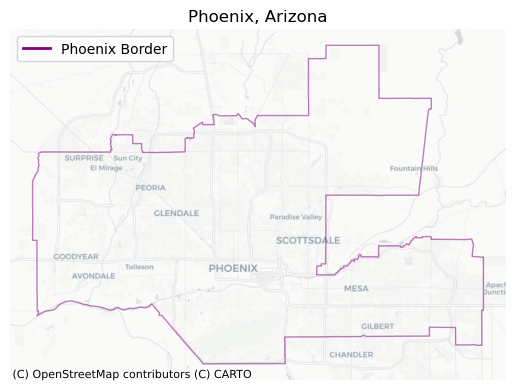

In [46]:
# Initialize plot
fig, ax = plt.subplots()

# Plot Phoenix border
phoenix.to_crs(epsg=3857).plot(ax=ax,
                               edgecolor = 'purple',
                               facecolor='none',
                               alpha=0.5,
                               figsize=(9,9),
                               label="Phoenix Border")

# Add basemap from contextily
cx.add_basemap(ax=ax, source = cx.providers.CartoDB.Positron) 

# Add title and switch off axis
ax.set_title("Phoenix, Arizona")
ax.set_axis_off()

# Add legend
legend_handles = [Line2D([0], [0], color='purple', lw=2, label='Phoenix Border')]
ax.legend(handles=legend_handles, loc='upper left')

plt.show()

Caption: Phoenix Subdivision Border, Arizona.

## Prepare for BII Analysis

Both our Phoenix and MPC data are loaded, fitered, and confirmed to be the correct extend. Let's prepare the data (by dropping a band and confirming the coordinate reference system match) for clipping and plotting for 2017 and 2020. 

#### 2017

In [47]:
# Drop band
bii2017 = bii2017.squeeze().drop_vars('band')

In [48]:
# Check and match CRS'
phoenix_match = phoenix.to_crs(bii2017.rio.crs)

assert bii2017.rio.crs == phoenix_match.crs

Now that a band has been dropped and the CRS' are confirmed to match, we can clip our raster to match the Phoenix area for 2017. 

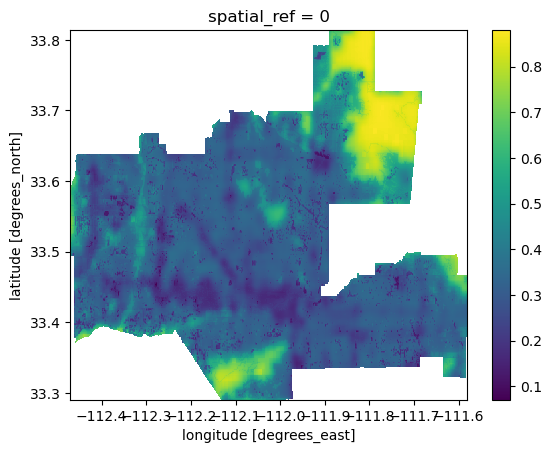

In [50]:
# Clip raster to match Phoenix extent
bii2017_clip = (bii2017.rio.clip_box(*phoenix_match.total_bounds).rio.clip(phoenix_match.geometry))

# View
bii2017_clip.plot()

#### 2020

In [18]:
# Drop band
bii2020 = bii2020.squeeze().drop_vars('band')

In [19]:
# Check and match CRS'
phoenix_match = phoenix.to_crs(bii2020.rio.crs)

assert bii2020.rio.crs == phoenix_match.crs

Now that a band has been dropped and the CRS' are confirmed to match, we can clip our raster to match the Phoenix area for 2020. 

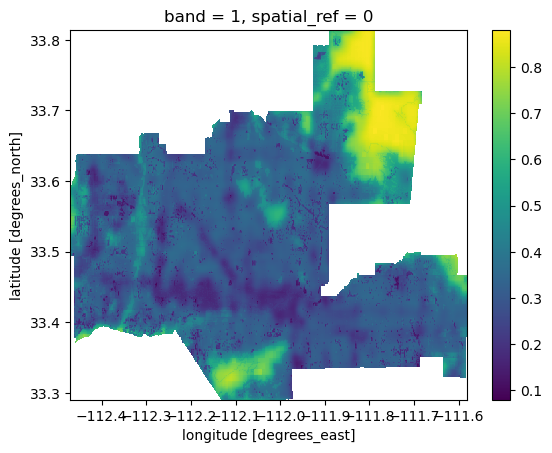

In [51]:
# Clip raster to match Phoenix extent
bii2020_clip = (bii2020.rio.clip_box(*phoenix_match.total_bounds).rio.clip(phoenix_match.geometry))

# View
bii2020_clip.plot()

## BII Analysis

As we are interested in calculating the percentage difference of BII area greater than 0.75 from 2017 to 2020, we need to find BII values greater than 0.75 for each year, find the total pixel amount for each year, and calculate the overall percentages for each year. 

#### Percentage area for 2017

In [52]:
# Find BII values > 0.75 for 2017 
bii2017_75 = (bii2017_clip >= 0.75).astype(int)

In [53]:
# Find total pixel amount
pixels_2017 = bii2017_clip.count().item()

# Check
pixels_2017

338699

In [54]:
# Pixels with BII > 0.75
pixel_values_2017 = bii2017_75.sum().item()

# Check
pixel_values_2017

24133

Now that we have the total pixel amount and the pixel amount with a BII greater than 0.75 for 2017, we can perform a simple calculation for the percentage.

In [55]:
# Calculate percentage
pct_2017 = round((pixel_values_2017/pixels_2017)*100, 2)

# View percentage
print("The percentage of Phoenix subdivision with a BII greater than or equal to 0.75 in 2017 is ", round(pct_2017, 2), "%")

The percentage of Phoenix subdivision with a BII greater than or equal to 0.75 in 2017 is  7.13 %


#### Percentage area for 2020

In [25]:
# Find BII values > 0.75 for 2020
bii2020_75 = (bii2020_clip >= 0.75).astype(int)

In [26]:
# Find total pixel amount
pixels_2020 = bii2020_clip.count().item()

# Check
pixels_2020

338699

In [27]:
# Pixels with BII > 0.75
pixel_values_2020 = bii2020_75.sum().item()

# Check
pixel_values_2020

21986

Now that we have the total pixel amount and the pixel amount with a BII greater than 0.75 for 2020, we can perform a simple calculation for the percentage.

In [28]:
# Calculate percentage
pct_2020 = round((pixel_values_2020/pixels_2020)*100, 2)

# View percentage
print("The percentage of Phoenix subdivision with a BII greater than or equal to 0.75 in 2020 is ", round(pct_2020, 2), "%")

The percentage of Phoenix subdivision with a BII greater than or equal to 0.75 in 2020 is  6.49 %


## Visualize BII Loss

To visualize the BII loss between 2017 and 2020, we need to calculate the percent loss, create a Boolean mask (True/False) where each value  is checked to see if it is greater than 0.75, and convert the Boolean result (True becomes 1 and False becomes 0) into integers.

In [56]:
# Calculate loss from 2017 to 2020
pct_loss = bii2017_75 - bii2020_75

In [57]:
# Make BII > 0.75 = 1
bii_loss = pct_loss == 1

# Convert Boolean type to integer
bii_loss = bii_loss.astype(int)

Now that our data is prepped, we can plot the BII change between 2017 and 2020 using `cmap`'s' `ListedColormap`. Let's make an initial plot first. 

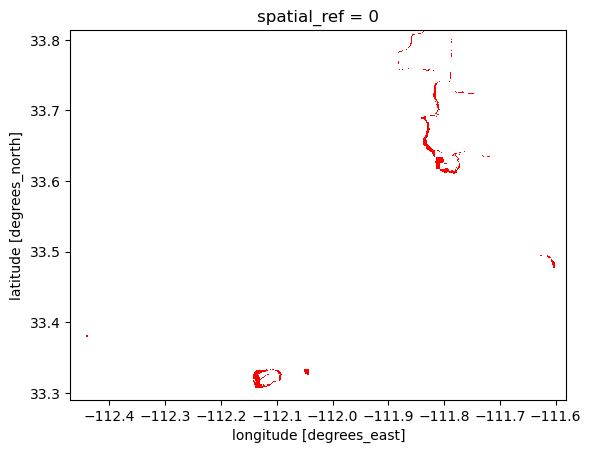

In [58]:
# Create color dictionary
colors = {
    0: "none",        # No Data
    1: "red",         # Bii loss 
}
    
# Create a ListedColormap
cmap = ListedColormap([colors[key] for key in sorted(colors.keys())])

# Initial plot to view BII change
bii_loss.plot(cmap=cmap, add_colorbar = False)

Our initial plot of BII loss doesn't mean much without the Phoenix basemap. To improve this, let's create a more detailed map that includes the Phoenix area and 2020 BII.

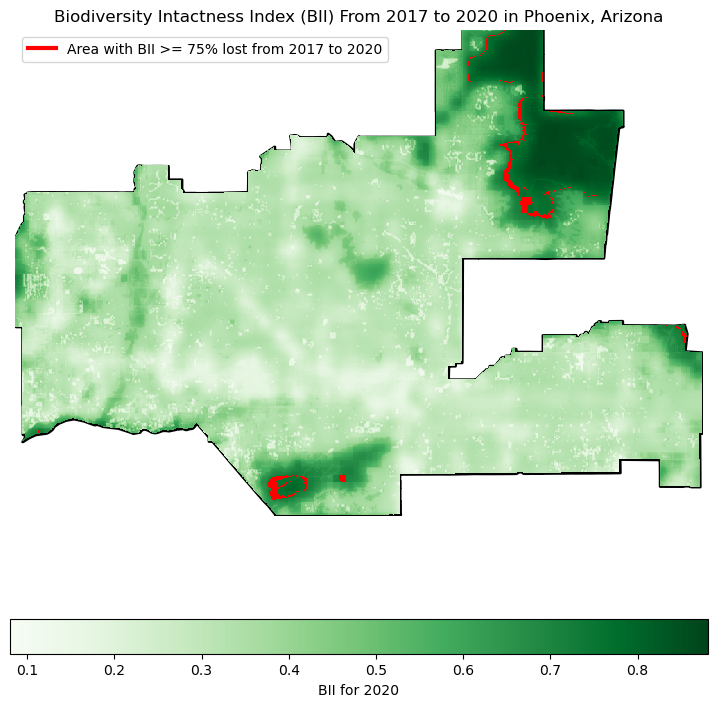

In [59]:
# Initialize Plot
fig, ax = plt.subplots(figsize = (9,9))

# Add Basemap
phoenix.plot(ax=ax,
            edgecolor = "black",
            linewidth = 2)

# Add 2020 BII
bii2020_clip.plot(ax=ax,
                  cmap = 'Greens',
                  cbar_kwargs = {"location": "bottom",
                                 "label": "BII for 2020"})

# Add BII difference
bii_loss.plot(ax=ax,
              cmap=cmap, 
              add_colorbar = False)

# Turn off axis
ax.set_axis_off()

# Set title
ax.set_title("Biodiversity Intactness Index (BII) From 2017 to 2020 in Phoenix, Arizona")

# Create custom legend
custom_legend = Line2D([0], [0], color='red', lw=3, label='Area with BII >= 75% lost from 2017 to 2020')

# Add the legend
ax.legend(handles=[custom_legend], loc='upper left', fontsize=10)

plt.show()

### Figure Summary
The areas with substantial BII loss greater than or equal to 75% are marked in red on the map above. Key regions of significant loss are located south of Phoenix City and northwest of Footland Hills, indicating that these are key areas for urbanization. This map shows us that these urbanized areas have a considerable environmental impact. 